In [ ]:
!pip install torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/ML_final_project')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

def load_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split(' ')
            path = parts[0]
            labels = parts[1:]
            data.append([path] + labels)

    # 转换为DataFrame
    # 第一列为path，其余列为标签
    data_df = pd.DataFrame(data)
    data_df.columns = ['path'] + [f'label_{i}' for i in range(1, len(data_df.columns))]
    return data_df

# 调用函数，替换'path_to_your_data.txt'为您的文件路径
data = load_data('/content/drive/MyDrive/ML_final_project/NUSWIDE/train.txt')

print(data.info())
print(data[:13])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 82 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   path      13000 non-null  object
 1   label_1   13000 non-null  object
 2   label_2   13000 non-null  object
 3   label_3   13000 non-null  object
 4   label_4   13000 non-null  object
 5   label_5   13000 non-null  object
 6   label_6   13000 non-null  object
 7   label_7   13000 non-null  object
 8   label_8   13000 non-null  object
 9   label_9   13000 non-null  object
 10  label_10  13000 non-null  object
 11  label_11  13000 non-null  object
 12  label_12  13000 non-null  object
 13  label_13  13000 non-null  object
 14  label_14  13000 non-null  object
 15  label_15  13000 non-null  object
 16  label_16  13000 non-null  object
 17  label_17  13000 non-null  object
 18  label_18  13000 non-null  object
 19  label_19  13000 non-null  object
 20  label_20  13000 non-null  object
 21  label_21  13

In [ ]:
# 将所有标签列转换为整数类型
converted_data = data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
# 检查数据类型
print(converted_data.dtypes)
# 查看是否有产生NaN的列
print(converted_data.isnull().any())

label_1     int64
label_2     int64
label_3     int64
label_4     int64
label_5     int64
            ...  
label_77    int64
label_78    int64
label_79    int64
label_80    int64
label_81    int64
Length: 81, dtype: object
label_1     False
label_2     False
label_3     False
label_4     False
label_5     False
            ...  
label_77    False
label_78    False
label_79    False
label_80    False
label_81    False
Length: 81, dtype: bool


In [ ]:
# 单独更新标签列数据
for column in converted_data.columns:
    data[column] = converted_data[column]
# 再次检查数据类型
print(data.dtypes)

path        object
label_1      int64
label_2      int64
label_3      int64
label_4      int64
             ...  
label_77     int64
label_78     int64
label_79     int64
label_80     int64
label_81     int64
Length: 82, dtype: object


In [ ]:
def build_sample_labels_dict(data):
    sample_labels = {}
    for idx, row in data.iterrows():
        # 假设标签从第2列开始
        labels = set(row.index[row == 1])  # 找出所有值为1的标签
        if labels:
            sample_labels[idx] = labels
    return sample_labels

# 重新计算标签索引
sample_labels = build_sample_labels_dict(data)

print(sample_labels)

{0: {'label_43', 'label_61', 'label_80'}, 1: {'label_12', 'label_2'}, 2: {'label_43'}, 3: {'label_56', 'label_44', 'label_1'}, 4: {'label_12', 'label_2'}, 6: {'label_43'}, 7: {'label_56', 'label_10', 'label_51'}, 8: {'label_43', 'label_9'}, 9: {'label_78', 'label_43'}, 10: {'label_43'}, 11: {'label_25'}, 12: {'label_14', 'label_34', 'label_9', 'label_56', 'label_31'}, 13: {'label_56', 'label_14'}, 14: {'label_43'}, 15: {'label_33', 'label_2', 'label_31'}, 16: {'label_45', 'label_77', 'label_52', 'label_35'}, 17: {'label_2'}, 20: {'label_67', 'label_43'}, 22: {'label_60'}, 23: {'label_76', 'label_42'}, 24: {'label_80', 'label_70', 'label_43', 'label_9', 'label_51'}, 26: {'label_76'}, 29: {'label_3'}, 31: {'label_71'}, 34: {'label_8', 'label_80'}, 35: {'label_34', 'label_43', 'label_51', 'label_56', 'label_40'}, 36: {'label_78', 'label_43'}, 37: {'label_57', 'label_2'}, 39: {'label_29'}, 40: {'label_56', 'label_52'}, 41: {'label_56', 'label_46'}, 42: {'label_2', 'label_27', 'label_31'}, 

In [ ]:
print(len(data))
# 打印以验证label_indices中的索引是否正确
# 打印字典的前10个元素
for idx, labels in list(sample_labels.items())[:10]:
    print(f"Sample index: {idx}, Labels with '1': {labels}")

13000
Sample index: 0, Labels with '1': {'label_43', 'label_61', 'label_80'}
Sample index: 1, Labels with '1': {'label_12', 'label_2'}
Sample index: 2, Labels with '1': {'label_43'}
Sample index: 3, Labels with '1': {'label_56', 'label_44', 'label_1'}
Sample index: 4, Labels with '1': {'label_12', 'label_2'}
Sample index: 6, Labels with '1': {'label_43'}
Sample index: 7, Labels with '1': {'label_56', 'label_10', 'label_51'}
Sample index: 8, Labels with '1': {'label_43', 'label_9'}
Sample index: 9, Labels with '1': {'label_78', 'label_43'}
Sample index: 10, Labels with '1': {'label_43'}


In [ ]:
import random

def generate_positive_pairs(sample_labels, num_pairs):
    keys = list(sample_labels.keys())
    positive_pairs = []
    count = 0

    while count < num_pairs:
        # 随机选择两个不同的样本索引
        idx1, idx2 = random.sample(keys, 2)
        # 检查两个样本的标签集合是否有交集
        if sample_labels[idx1] & sample_labels[idx2]:
            positive_pairs.append((idx1, idx2))
            count += 1

    return positive_pairs

# 假设您想生成100对正样本
positive_pairs = generate_positive_pairs(sample_labels, 100)
print(len(positive_pairs))

100


In [ ]:
def generate_negative_pairs(sample_labels, num_pairs):
    keys = list(sample_labels.keys())
    negative_pairs = []
    count = 0

    while count <= num_pairs:
        idx1, idx2 = random.sample(keys, 2)
        if not (sample_labels[idx1] & sample_labels[idx2]):  # 确保没有共享的标签
            negative_pairs.append((idx1, idx2))
        count += 1

    return negative_pairs

# 生成100对负样本
negative_pairs = generate_negative_pairs(sample_labels, 100)
print(len(negative_pairs))

69


In [ ]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms

class ImagePairsDataset(Dataset):
    def __init__(self, data, pairs, labels, base_path, transform=None):
        self.data = data
        self.pairs = pairs
        self.labels = labels
        self.base_path = base_path  # 添加基础路径
        self.transform = transform

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, index):
        idx1, idx2 = self.pairs[index]
        path1 = os.path.join(self.base_path, os.path.basename(self.data.loc[idx1, 'path']))
        path2 = os.path.join(self.base_path, os.path.basename(self.data.loc[idx2, 'path']))
        label = self.labels[index]
        image1 = Image.open(path1).convert('RGB')
        image2 = Image.open(path2).convert('RGB')

        if self.transform:
            image1 = self.transform(image1)
            image2 = self.transform(image2)
        return image1, image2, torch.tensor(label, dtype=torch.float32)

# 合并正负样本对和标签
all_pairs = positive_pairs + negative_pairs
all_labels = [1] * len(positive_pairs) + [0] * len(negative_pairs)

base_path = '/content/drive/MyDrive/ML_final_project/NUSWIDE/train_image'

# 定义图像变换
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 调整图像大小
    transforms.ToTensor(),  # 转换为张量
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # 归一化
])

# 创建数据集和数据加载器
dataset = ImagePairsDataset(data, all_pairs, all_labels, base_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [ ]:
import os
import torch
# 验证 dataloader 输出
for x1, x2, sij in dataloader:
    print(type(x1), x1.shape)  # 应该是 Tensor 类型，形状应为 (batch_size, 3, 224, 224)
    print(type(x2), x2.shape)  # 应该是 Tensor 类型，形状应为 (batch_size, 3, 224, 224)
    print(type(sij), sij.shape)  # 应该是 Tensor 类型，形状应为 (batch_size,)
    break  # 只验证一个批次

<class 'torch.Tensor'> torch.Size([64, 3, 224, 224])
<class 'torch.Tensor'> torch.Size([64, 3, 224, 224])
<class 'torch.Tensor'> torch.Size([64])


In [ ]:
import torch
import torch.nn as nn
from torchvision import models
from torch.optim import SGD
from torchvision.transforms import transforms
from torch.utils.data import DataLoader

In [ ]:
class DeepHashingNet(nn.Module):
    def __init__(self):
        super(DeepHashingNet, self).__init__()
        # 加载预训练的 AlexNet 并移除最后一层
        self.alexnet = models.alexnet(pretrained=True)
        self.alexnet.classifier = nn.Sequential(*list(self.alexnet.classifier.children())[:-1])
        # 定义哈希层
        self.hash_layer = nn.Linear(4096, 16)

    def forward_one(self, x):
        x = self.alexnet(x)
        x = self.hash_layer(x)
        x = torch.tanh(x)  # 使用反正切函数压制到[-1,1]
        return x

    def forward(self, x1, x2):
        h1 = self.forward_one(x1)
        h2 = self.forward_one(x2)
        return h1, h2

# 实例化模型
model = DeepHashingNet()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 181MB/s]


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class PriorityCrossEntropyLoss(nn.Module):
    def __init__(self, gamma=0.5, beta=0.5):
        super(PriorityCrossEntropyLoss, self).__init__()
        self.gamma = gamma
        self.beta = beta

    def forward(self, h1, h2, sij):
        # 计算哈希码的内积 <hi, hj>
        inner_product = torch.sum(h1 * h2, dim=1)

        # 定义σ(x)函数
        sigma = lambda x: 1 / (1 + torch.exp(-self.beta * x))

        # 计算 pij
        pij = torch.where(sij == 1, sigma(inner_product), 1 - sigma(inner_product))

        # 计算余弦相似度 cos(hi, hj)
        cos_sim = F.cosine_similarity(h1, h2)

        # 计算 qij
        qij = torch.where(sij == 1, (1 + cos_sim) / 2, (1 - cos_sim) / 2)

        # 计算 |Si|, |Sj|, |Si1|, |Sj1|, |Si0|, |Sj0|
        N = len(sij)  # 批次大小
        # 初始化统计向量
        Si1 = torch.zeros(N)
        Si0 = torch.zeros(N)
        Sj1 = torch.zeros(N)
        Sj0 = torch.zeros(N)

        # 计算统计数据
        for i in range(N):
            for j in range(N):
                if i != j:  # 确保不与自身比较
                    if sij[i] == 1:
                        Si1[i] += 1
                        Sj1[j] += 1
                    else:
                        Si0[i] += 1
                        Sj0[j] += 1

        Si = Si1 + Si0
        Sj = Sj1 + Sj0

        # 计算 αij
        alpha_similar = (Si * Sj) / torch.sqrt(Si1 * Sj1)
        alpha_dissimilar = (Si * Sj) / torch.sqrt(Si0 * Sj0)
        αij = torch.where(sij == 1, alpha_similar, alpha_dissimilar)

        # 计算优先交叉熵损失
        loss = -αij * torch.pow(1 - qij, self.gamma) * torch.log(pij)
        return torch.mean(loss)

In [ ]:
import torch
import torch.nn as nn

class PriorityQuantizationLoss(nn.Module):
    def __init__(self, gamma=2, epsilon=1):
        super(PriorityQuantizationLoss, self).__init__()
        self.gamma = gamma
        self.epsilon = epsilon

    def forward(self, h):
        # 计算 |hi|
        abs_h = torch.abs(h)

        # 基于公式 13 计算 qi
        ones_vector = torch.ones_like(abs_h)
        cos_sim = F.cosine_similarity(abs_h, ones_vector, dim=1)
        qi = (1 + cos_sim) / 2

        # 基于公式 11 计算 pi
        l1_norm = torch.sum(torch.abs(abs_h - 1), dim=1)
        pi = (1 / (2 * self.epsilon)) * torch.exp(-l1_norm / self.epsilon)

        # 计算优先量化损失
        quantization_loss = -torch.pow(1 - qi, self.gamma) * torch.log(pi)

        return torch.mean(quantization_loss)

In [ ]:
# 获取所有参数
fch_params = [param for name, param in model.named_parameters() if 'hash_layer' in name]
other_params = [param for name, param in model.named_parameters() if 'hash_layer' not in name]

# 设定优化器，为哈希层和其他层设置不同的学习率
optimizer = torch.optim.SGD([
    {'params': fch_params, 'lr': 0.05},
    {'params': other_params, 'lr': 0.005}
], momentum=0.9, weight_decay=0.0005)

# 使用学习率退火策略
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100000, gamma=0.1)

In [ ]:
# 定义损失函数
criterion_ce = PriorityCrossEntropyLoss(gamma=2, beta=1)  # 交叉熵损失部分
criterion_q = PriorityQuantizationLoss(gamma=2, epsilon=10)  # 量化损失部分

In [ ]:
# 训练循环中的相应部分
num_epochs = 300 // len(dataloader)  # 根据max_iter和数据集大小计算epoch数量
print(num_epochs)

100


In [ ]:
for epoch in range(num_epochs):
    for x1, x2, sij in dataloader:
        model.train()
        optimizer.zero_grad()
        h1, h2 = model(x1, x2)

        loss_ce = criterion_ce(h1, h2, sij)
        loss_q_h1 = criterion_q(h1)  # 应用于 h1
        loss_q_h2 = criterion_q(h2)  # 应用于 h2

        loss = loss_ce + loss_q_h1 + loss_q_h2
        loss.backward()
        optimizer.step()

    # 学习率调度
    scheduler.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

    # 每50次迭代保存一次模型
    if epoch % 50 == 0:
        torch.save(model.state_dict(), f"/content/drive/MyDrive/ML_final_project/model/alexnet_hashing_with_L_Q_loss_{epoch}_NUS.pth")

Epoch 1, Loss: 394.3543701171875
Epoch 2, Loss: 394.3543395996094
Epoch 3, Loss: 429.44488525390625
Epoch 4, Loss: 355.91339111328125
Epoch 5, Loss: 461.9167785644531
Epoch 6, Loss: 406.38134765625
Epoch 7, Loss: 394.3543395996094
Epoch 8, Loss: 406.38134765625
Epoch 9, Loss: 418.0693664550781
Epoch 10, Loss: 381.9581298828125
Epoch 11, Loss: 429.44488525390625
Epoch 12, Loss: 406.38134765625
Epoch 13, Loss: 394.3543395996094
Epoch 14, Loss: 451.34912109375
Epoch 15, Loss: 381.9581298828125
Epoch 16, Loss: 440.5313415527344
Epoch 17, Loss: 369.1578369140625
Epoch 18, Loss: 429.4449462890625
Epoch 19, Loss: 394.3543701171875
Epoch 20, Loss: 394.3543395996094
Epoch 21, Loss: 440.53131103515625
Epoch 22, Loss: 369.1578674316406
Epoch 23, Loss: 418.0693664550781
Epoch 24, Loss: 406.38134765625
Epoch 25, Loss: 418.0693664550781
Epoch 26, Loss: 440.53131103515625
Epoch 27, Loss: 440.5313415527344
Epoch 28, Loss: 440.53131103515625
Epoch 29, Loss: 406.38134765625
Epoch 30, Loss: 472.250518798

In [ ]:
# 保存模型
model_save_path = '/content/drive/MyDrive/ML_final_project/model/alexnet_hashing_with_L_Q_loss_NUS.pth'
torch.save(model.state_dict(), model_save_path)
print("Saved model's state_dict successfully.")

Saved model's state_dict successfully.


In [ ]:
query_data = load_data('/content/drive/MyDrive/ML_final_project/NUSWIDE/test.txt')
database_data = load_data('/content/drive/MyDrive/ML_final_project/NUSWIDE/database.txt')

In [ ]:
# 将所有标签列转换为整数类型
converted_query_data = query_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
converted_database_data = database_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# 单独更新标签列数据
for column in converted_query_data.columns:
    query_data[column] = converted_query_data[column]

for column in converted_database_data.columns:
    database_data[column] = converted_database_data[column]

print(query_data.dtypes)
print(database_data.dtypes)

path        object
label_1      int64
label_2      int64
label_3      int64
label_4      int64
             ...  
label_77     int64
label_78     int64
label_79     int64
label_80     int64
label_81     int64
Length: 82, dtype: object
path        object
label_1      int64
label_2      int64
label_3      int64
label_4      int64
             ...  
label_77     int64
label_78     int64
label_79     int64
label_80     int64
label_81     int64
Length: 82, dtype: object


In [ ]:
# 重新计算标签索引
sample_query_labels = build_sample_labels_dict(query_data)
sample_database_labels = build_sample_labels_dict(database_data)

print(sample_query_labels)
print(sample_database_labels)

{0: {'label_12', 'label_2'}, 1: {'label_56', 'label_45', 'label_31'}, 2: {'label_43'}, 3: {'label_2'}, 4: {'label_50'}, 6: {'label_76'}, 7: {'label_2', 'label_19'}, 8: {'label_70'}, 9: {'label_2', 'label_68'}, 10: {'label_2', 'label_6', 'label_5', 'label_3', 'label_50'}, 11: {'label_2'}, 12: {'label_41', 'label_8', 'label_76', 'label_56'}, 15: {'label_41'}, 16: {'label_56', 'label_14'}, 17: {'label_43'}, 18: {'label_80', 'label_9'}, 19: {'label_6', 'label_80'}, 20: {'label_56', 'label_14', 'label_67', 'label_43'}, 21: {'label_56', 'label_38'}, 22: {'label_14', 'label_35', 'label_56', 'label_76', 'label_50'}, 23: {'label_43'}, 24: {'label_54'}, 25: {'label_43'}, 26: {'label_14', 'label_2'}, 27: {'label_56', 'label_76', 'label_43'}, 28: {'label_23', 'label_2'}, 29: {'label_56', 'label_43'}, 31: {'label_80', 'label_9'}, 33: {'label_26'}, 35: {'label_3'}, 37: {'label_14', 'label_74', 'label_56', 'label_76', 'label_40', 'label_50'}, 38: {'label_76', 'label_52', 'label_29', 'label_35'}, 39: 

In [ ]:
# 生成查询集的正负样本对
positive_query_pairs = generate_positive_pairs(sample_query_labels, 50)
negative_query_pairs = generate_negative_pairs(sample_query_labels, 50)
all_query_pairs = positive_query_pairs + negative_query_pairs
all_query_labels = [1] * len(positive_query_pairs) + [0] * len(negative_query_pairs)

print(len(positive_query_pairs))
print(len(negative_query_pairs))

50
33


In [ ]:
# 生成数据库集的正负样本对
positive_database_pairs = generate_positive_pairs(sample_database_labels, 100)
negative_database_pairs = generate_negative_pairs(sample_database_labels, 100)
all_database_pairs = positive_database_pairs + negative_database_pairs
all_database_labels = [1] * len(positive_database_pairs) + [0] * len(negative_database_pairs)

print(len(positive_database_pairs))
print(len(negative_database_pairs))

100
73


In [ ]:
base_query_path = '/content/drive/MyDrive/ML_final_project/NUSWIDE/test_image'
base_database_path = '/content/drive/MyDrive/ML_final_project/NUSWIDE/database_image'

# 创建数据集和数据加载器
query_dataset = ImagePairsDataset(query_data, all_query_pairs, all_query_labels, base_query_path, transform=transform)
database_dataset = ImagePairsDataset(database_data, all_database_pairs, all_database_labels, base_database_path, transform=transform)

query_dataloader = DataLoader(query_dataset, batch_size=32, shuffle=False)
database_dataloader = DataLoader(database_dataset, batch_size=32, shuffle=False)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for x1, x2, labels in dataloader:
            h1, h2 = model(x1, x2)
            inner_product = torch.sum(h1 * h2, dim=1)
            preds = torch.sigmoid(inner_product).round()  # 将预测值转换为0或1

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    return accuracy, precision, recall, f1

In [ ]:
# 使用模型进行评估
accuracy, precision, recall, f1 = evaluate_model(model, query_dataloader)

Accuracy: 0.6024
Precision: 0.6024
Recall: 1.0000
F1 Score: 0.7519


In [ ]:
def generate_binary_hash_codes(model, dataloader):
    model.eval()
    hash_codes = []
    labels = []

    with torch.no_grad():
        for x1, x2, sij in dataloader:
            h1, h2 = model(x1, x2)
            h1_binary = (h1 > 0).int().cpu().numpy()
            h2_binary = (h2 > 0).int().cpu().numpy()
            hash_codes.append(h1_binary)
            hash_codes.append(h2_binary)
            labels.append(sij.cpu().numpy())
            labels.append(sij.cpu().numpy())

    hash_codes = np.vstack(hash_codes)
    labels = np.hstack(labels)

    return hash_codes, labels

In [ ]:
# 生成哈希码
query_codes, query_labels = generate_binary_hash_codes(model, query_dataloader)
database_codes, database_labels = generate_binary_hash_codes(model, database_dataloader)

In [ ]:
def mean_average_precision(query_codes, query_labels, database_codes, database_labels):
    num_queries = query_codes.shape[0]
    APs = []

    for i in range(num_queries):
        query_code = query_codes[i]
        query_label = query_labels[i]

        hamming_dist = np.sum(np.bitwise_xor(query_code, database_codes), axis=1)
        sorted_indices = np.argsort(hamming_dist)

        relevant = (database_labels[sorted_indices] == query_label)
        relevant = relevant.astype(np.int32)

        precision_at_k = np.cumsum(relevant) / (np.arange(len(relevant)) + 1)
        AP = np.sum(precision_at_k * relevant) / np.sum(relevant)
        APs.append(AP)

    return np.mean(APs)

In [ ]:
map_score = mean_average_precision(query_codes, query_labels, database_codes, database_labels)
print(f'Mean Average Precision (MAP): {map_score:.4f}')

Mean Average Precision (MAP): 0.5482


In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

def precision_recall_curve_plot(query_codes, query_labels, database_codes, database_labels):
    all_precisions = []
    all_recalls = []

    for i in range(query_codes.shape[0]):
        query_code = query_codes[i]
        query_label = query_labels[i]

        hamming_dist = np.sum(np.bitwise_xor(query_code, database_codes), axis=1)
        sorted_indices = np.argsort(hamming_dist)

        relevant = (database_labels[sorted_indices] == query_label)

        precision, recall, _ = precision_recall_curve(relevant, -hamming_dist[sorted_indices])
        all_precisions.append(precision)
        all_recalls.append(recall)

    # Average Precision-Recall curve
    avg_precisions = np.mean(np.array([np.interp(np.linspace(0, 1, num=100), recall[::-1], precision[::-1]) for precision, recall in zip(all_precisions, all_recalls)]), axis=0)
    avg_recalls = np.linspace(0, 1, num=100)

    plt.plot(avg_recalls, avg_precisions, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

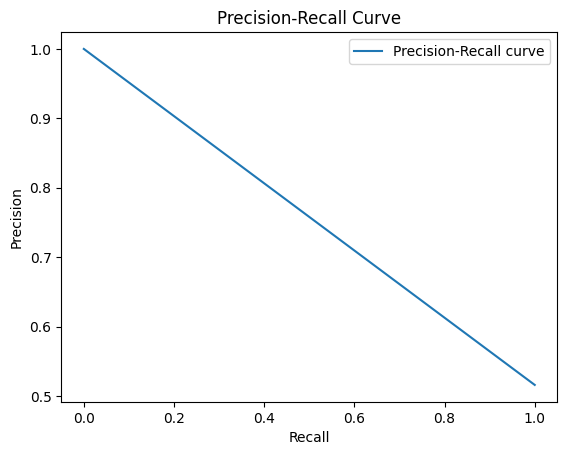

In [ ]:
precision_recall_curve_plot(query_codes, query_labels, database_codes, database_labels)

In [ ]:
def precision_at_hamming_2(query_codes, query_labels, database_codes, database_labels):
    precisions = []

    for i in range(query_codes.shape[0]):
        query_code = query_codes[i]
        query_label = query_labels[i]

        hamming_dist = np.sum(np.bitwise_xor(query_code, database_codes), axis=1)

        within_h2 = hamming_dist <= 2
        if np.sum(within_h2) == 0:
            continue

        relevant = (database_labels[within_h2] == query_label)
        precision = np.mean(relevant)
        precisions.append(precision)

    return np.mean(precisions)


In [ ]:
precision_h2 = precision_at_hamming_2(query_codes, query_labels, database_codes, database_labels)
print(f'Precision at Hamming Distance <= 2: {precision_h2:.4f}')

Precision at Hamming Distance <= 2: 0.5160


In [ ]:
def precision_at_n(query_codes, query_labels, database_codes, database_labels, N):
    precisions = []

    for i in range(query_codes.shape[0]):
        query_code = query_codes[i]
        query_label = query_labels[i]

        hamming_dist = np.sum(np.bitwise_xor(query_code, database_codes), axis=1)
        sorted_indices = np.argsort(hamming_dist)[:N]

        relevant = (database_labels[sorted_indices] == query_label)
        precision = np.mean(relevant)
        precisions.append(precision)

    return np.mean(precisions)


In [ ]:
p_at_n = precision_at_n(query_codes, query_labels, database_codes, database_labels, N=5000)
print(f'Precision at N (P@N) for N=100: {p_at_n:.4f}')

Precision at N (P@N) for N=100: 0.5160
